In [4]:
# importing all packages
import pandas as pd
import gzip
import re
from urllib.parse import urlparse, parse_qsl, unquote
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np
import datetime 
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import plotly.graph_objects as go 
import plotly.express as px
import asyncio
from plotly.subplots import make_subplots
import pickle

%matplotlib inline

In [41]:
# Load DataFrame from the pickle file
with open('nbgitpuller_df_serialized.pkl', 'rb') as file:
    nbgitpuller_textPayload_df_pull_normal = pickle.load(file)

Data loaded successfully!
  log_info_type timestamp_date timestamp_time    action  \
0             I     2024-08-22   03:47:54.326  git-pull   
1             I     2024-08-22   02:19:11.021  git-pull   
2             I     2024-08-22   02:19:26.667  git-pull   
3             I     2024-08-22   02:49:28.938  git-pull   
4             I     2024-08-22   02:52:12.066  git-pull   

                                           git_query  \
0  [(repo, https://github.com/stat20/stat20-assig...   
1  [(repo, https://github.com/data-8/materials-sp...   
2  [(repo, https://github.com/data-8/materials-sp...   
3  [(repo, https://github.com/data-8/materials-su...   
4  [(repo, https://github.com/data-8/materials-sp...   

                                           repo             git_user_content  \
0  https://github.com/stat20/stat20-assignments  [stat20/stat20-assignments]   
1      https://github.com/data-8/materials-sp24      [data-8/materials-sp24]   
2      https://github.com/data-8/materials

In [9]:
# Load DataFrame from the pickle file
with open('nbgitpuller_df_abnormal_serialized.pkl', 'rb') as file:
    nbgitpuller_textPayload_df_pull_abnormal = pickle.load(file)
#print("Data loaded successfully!")
#print(nbgitpuller_textPayload_df_pull_abnormal.head())

Data loaded successfully!
      log_info_type timestamp_date timestamp_time    action  \
6997              I     2024-08-29   07:12:32.038  git-pull   
8939              I     2024-08-29   02:10:24.631  git-pull   
13685             I     2024-09-01   14:24:46.060  git-pull   
13686             I     2024-09-01   14:24:45.672  git-pull   
13687             I     2024-09-01   14:24:45.290  git-pull   

                                               git_query  \
6997                                     [(repo, https)]   
8939                                    [(repo, https:)]   
13685  [(repo, https/hub/login?next=/hub/user-redirec...   
13686  [(repo, https/hub/login?next=/hub/user-redirec...   
13687                                    [(repo, https)]   

                                                    repo git_user_content  \
6997                                               https               []   
8939                                              https:               []   
136

# Overall Visualizations

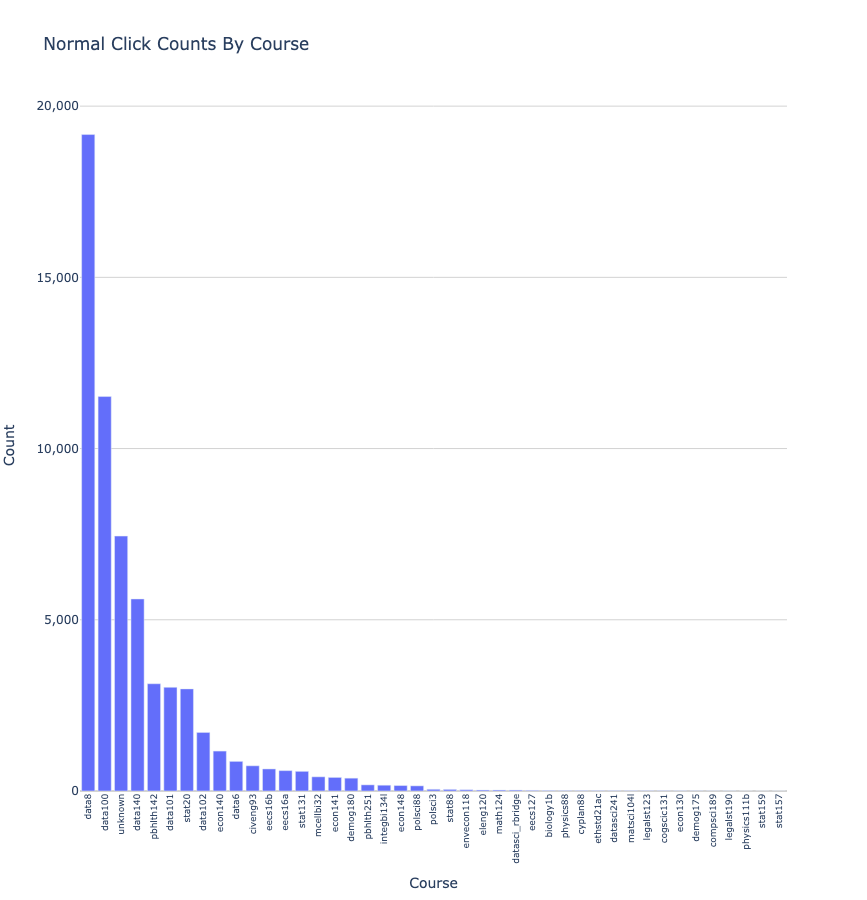

In [11]:
course_count = nbgitpuller_textPayload_df_pull_normal.course.value_counts()

fig = go.Figure(data=[go.Bar(
    x=course_count.index,
    y=course_count,
    text=None,
    textposition='outside'
)])

fig.update_layout(
    title='Normal Click Counts By Course',
    xaxis_title='Course',
    yaxis_title='Count',
    xaxis=dict(
        tickangle=-90, 
        tickmode='array',  
        tickvals=list(range(len(course_count))),  
        ticktext=course_count.index, 
        tickfont=dict(size=9)
    ),
    yaxis=dict(
        tickformat=',d', 
        gridcolor='LightGrey',  
        zerolinecolor='LightGrey'
    ),
    width=1000,  
    height=900, 
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    hovermode='x unified',  
)

for trace in fig.data:
    trace.hoverinfo = 'x+y'
    trace.hoverlabel = dict(bgcolor="LightGrey", font_size=16)

fig.show()

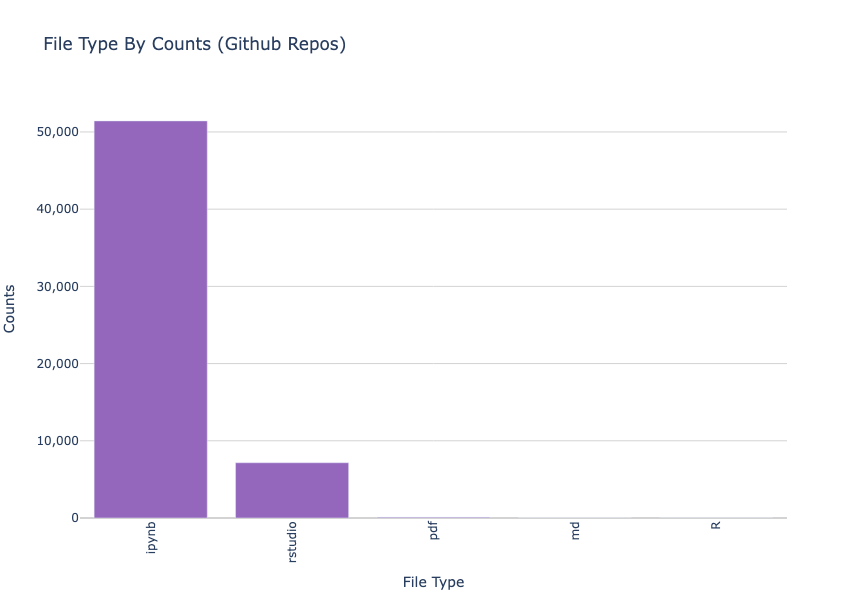

In [12]:
file_types_count = nbgitpuller_textPayload_df_pull_normal.file_extension[nbgitpuller_textPayload_df_pull_normal.file_extension != 'NaN'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=file_types_count.index,
    y=file_types_count,
    text=None,
    textposition='outside', 
    marker= dict(color='#9467bd')
)])

fig.update_layout(
    title='File Type By Counts (Github Repos)',
    xaxis_title='File Type',
    yaxis_title='Counts',
    xaxis=dict(
        tickangle=-90,  
    ),
    yaxis=dict(
        tickformat=',d', 
        gridcolor='LightGrey',  
        zerolinecolor='LightGrey'
    ),
    width=900,  
    height=600, 
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    hovermode='x unified',  
)

for trace in fig.data:
    trace.hoverinfo = 'x+y'
    trace.hoverlabel = dict(bgcolor="LightGrey", font_size=16)

fig.show()


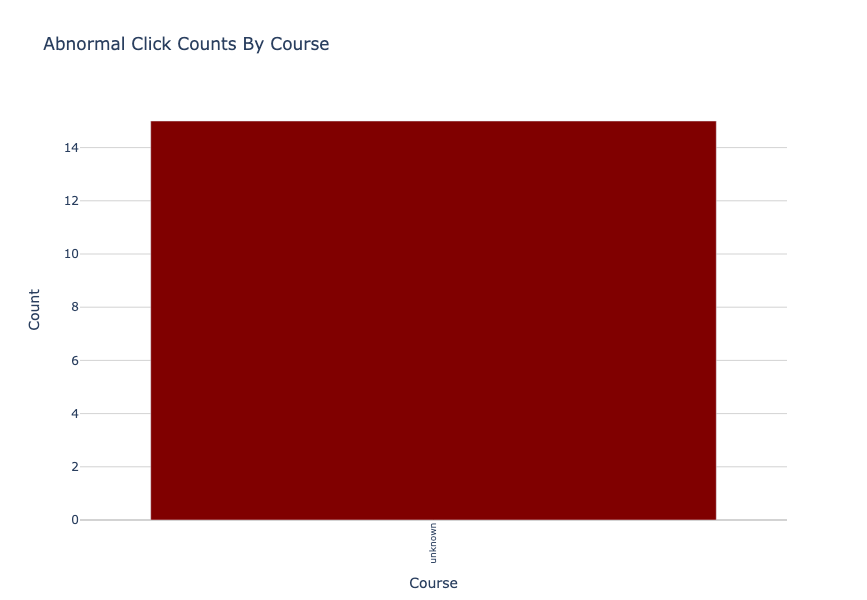

In [13]:
abnormal_course_count = nbgitpuller_textPayload_df_pull_abnormal.course.value_counts()

fig = go.Figure(data=[go.Bar(
    x=abnormal_course_count.index,
    y=abnormal_course_count,
    text=None,
    textposition='outside',
    marker=dict(color='maroon')

)])

fig.update_layout(
    title='Abnormal Click Counts By Course',
    xaxis_title='Course',
    yaxis_title='Count',
    xaxis=dict(
        tickangle=-90,  
        tickmode='array', 
        tickvals=list(range(len(abnormal_course_count))), 
        ticktext=abnormal_course_count.index, 
        tickfont=dict(size=9)
    ),
    yaxis=dict(
        tickformat=',d', 
        gridcolor='LightGrey',  
        zerolinecolor='LightGrey'
    ),
    width=800,  
    height=600, 
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    hovermode='x unified',  
)

for trace in fig.data:
    trace.hoverinfo = 'x+y'
    trace.hoverlabel = dict(bgcolor="LightGrey", font_size=16)

fig.show()


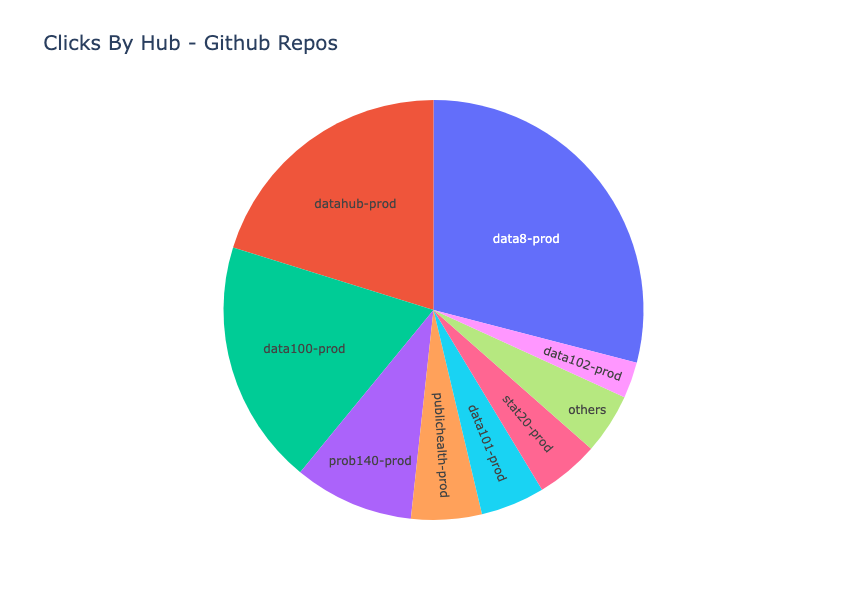

In [14]:
clicks_by_hub = nbgitpuller_textPayload_df_pull_normal.hub.value_counts()

clicks_by_hub_top8 = dict(clicks_by_hub[:8])
clicks_by_hub_top8['others'] = clicks_by_hub[8:].sum()

clicks_by_hub_top8_df = pd.DataFrame(clicks_by_hub_top8.items(), columns=['hub', 'counts'])

fig = px.pie(clicks_by_hub_top8_df, values='counts', names='hub', title='Clicks By Hub - Github Repos')

fig.update_traces(
    textinfo='label',  
    hoverinfo='label+percent+value',  
    hovertemplate='<b>%{label}</b><br>Percentage: %{percent:.2%}<br>Count: %{value}<extra></extra>'
)

fig.update_layout(
    width=800,  
    height=600, 
    title_font_size=20,
    showlegend=False
)
fig.show()

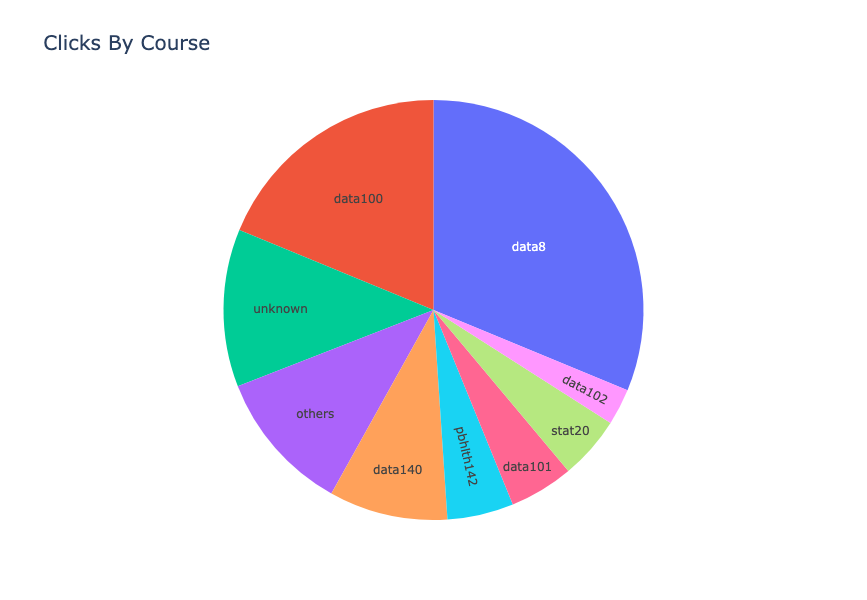

In [15]:
courses_top8 = dict(course_count[:8])
courses_top8['others'] = course_count[8:].sum()
courses_top8_df = pd.DataFrame(courses_top8.items(), columns = ['course', 'counts'])

fig = px.pie(courses_top8_df, values='counts', names='course', title='Clicks By Course')

fig.update_traces(
    textinfo='label',  
    hoverinfo='label+percent',  
    hovertemplate='<b>%{label}</b><br>Percentage: %{percent:.2%}<br>Count: %{value}<extra></extra>'
)

fig.update_layout(
    width=800,  
    height=600, 
    title_font_size=20, 
    showlegend=False
)
fig.show()

## Distributions By Semester

In [16]:
#sort df by semester 
#give sem intrinsic numerical value
sem_order = ["summer2024","spring2024", "fall2023", "summer2023", "spring2023", "fall2022", "summer2022", "spring2022", "fall2021", "summer2021", "spring2021", "fall2020", "summer2020", "spring2020", "fall2019", "summer2019", "spring2019", "unknown"]
nbgitpuller_textPayload_df_pull_normal.loc[:, "semester"] = pd.Categorical(
    nbgitpuller_textPayload_df_pull_normal["semester"],
    categories=sem_order,
    ordered=True
)
nbgitpuller_textPayload_df_pull_normal_sem_sort = nbgitpuller_textPayload_df_pull_normal.sort_values("semester")
sorted_sem_count = nbgitpuller_textPayload_df_pull_normal_sem_sort.semester.value_counts().reindex(sem_order)

In [17]:
agg_sem_counts = nbgitpuller_textPayload_df_pull_normal_sem_sort.groupby("semester").count().reset_index()
agg_sem_counts = agg_sem_counts.loc[:, ["semester", "log_info_type"]].rename(columns={"log_info_type":"count"})

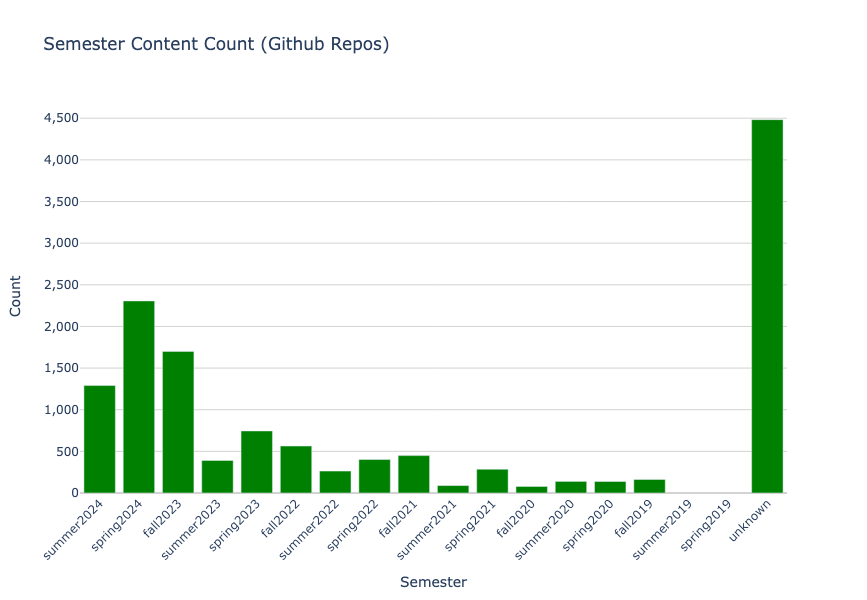

In [18]:
fig = go.Figure(data=[go.Bar(
    x=agg_sem_counts['semester'], 
    y=agg_sem_counts['count'], 
    text=None,
    textposition='outside', 
    marker= dict(color='green')
)])

fig.update_layout(
    title='Semester Content Count (Github Repos)',
    xaxis_title='Semester',
    yaxis_title='Count',
    xaxis=dict(
        tickangle=-45, 
        categoryarray=sem_order,
    ),
    yaxis=dict(
        tickformat=',d', 
        gridcolor='LightGrey',  
        zerolinecolor='LightGrey'
    ),
    width=800,  
    height=600, 
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    hovermode='x unified',  
)

for trace in fig.data:
    trace.hoverinfo = 'x+y'
    trace.hoverlabel = dict(bgcolor="LightGrey", font_size=16)

fig.show()

In [19]:
def format_semester(semester):
    if semester == "Unknown": 
        return "Unknown"
    else: 
        season = semester[:-4].capitalize()
        year = semester[-4:]
        return f"{season} {year}"

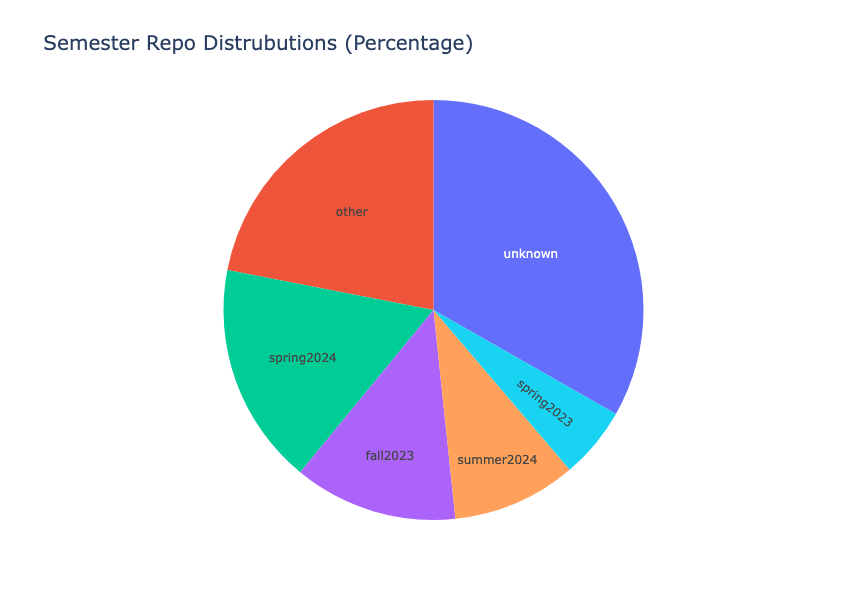

In [20]:
sem_count = nbgitpuller_textPayload_df_pull_normal.semester.value_counts()
sem_count5 = dict(sem_count[:5])
sem_count5['other'] = sem_count[5:].sum()
sem_count5 = pd.DataFrame(sem_count5.items(), columns = ['semester', 'counts'])

fig = px.pie(sem_count5, values = 'counts', names='semester', title='Semester Repo Distrubutions (Percentage)')

fig.update_traces(
    textinfo='label',  
    hoverinfo='label+percent',  
    hovertemplate='<b>%{label}</b>: %{percent:.2%}'
)

fig.update_layout(
    width=800,  
    height=600, 
    title_font_size=20,
    showlegend=False
)
fig.show()

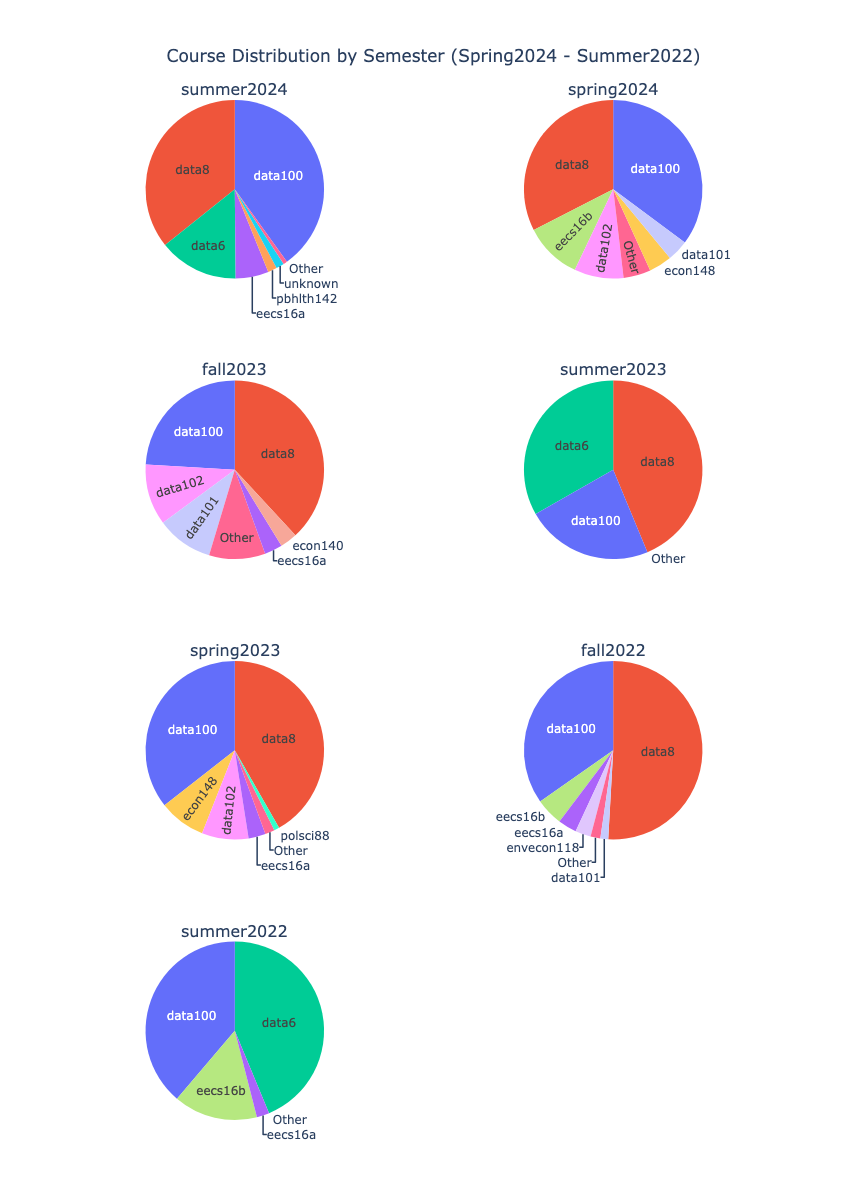

In [21]:
unique_sem = ['summer2024','spring2024', 'fall2023', 'summer2023', 'spring2023', 'fall2022', 'summer2022']

rows = len(unique_sem) // 2 + len(unique_sem) % 2 

fig = make_subplots(
    rows=rows, 
    cols=2, 
    subplot_titles=unique_sem, 
    specs=[[{'type':'domain'}]*2]*rows, 
    vertical_spacing=0.1
)

for i, semester in enumerate(unique_sem):
    filtered_sem = nbgitpuller_textPayload_df_pull_normal_sem_sort[
        nbgitpuller_textPayload_df_pull_normal_sem_sort['semester'] == semester
    ]
    semester_dist = filtered_sem['course'].value_counts()[:6]
    sem_other = filtered_sem['course'].value_counts()[6:].sum()
    semester_dist['Other'] = sem_other
    
    row = i // 2 + 1 
    col = i % 2 + 1 
    fig.add_trace(go.Pie(
        labels=semester_dist.index, 
        values=semester_dist.values, 
        name=semester, 
        textinfo='label',
        hoverinfo='label+percent+value'  
    ), row=row, col=col)

fig.update_layout(
    title=dict(
        text="Course Distribution by Semester (Spring2024 - Summer2022)",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ), 
    height=300 * rows,
    showlegend=False,     
)

fig.show()

In [22]:
courses_data = nbgitpuller_textPayload_df_pull_normal.groupby("timestamp_date").count()

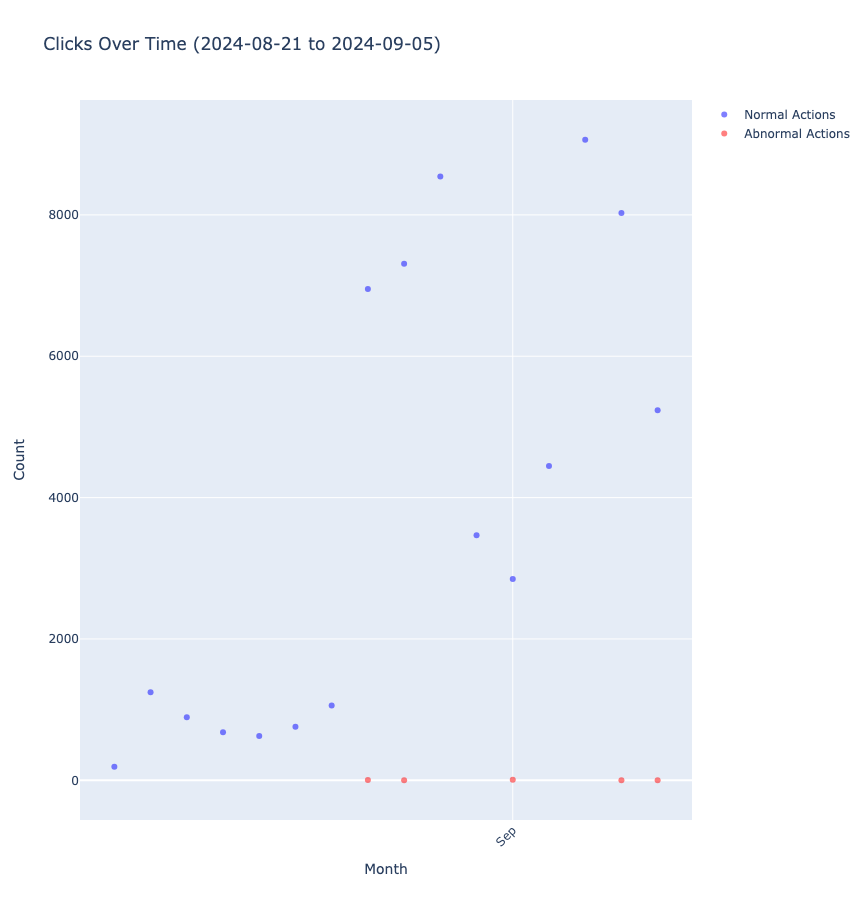

In [23]:
courses_data_abnormal = nbgitpuller_textPayload_df_pull_abnormal.groupby("timestamp_date").count()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=courses_data.index,
    y=courses_data['action'],
    mode='markers',
    name='Normal Actions',
    hovertemplate='<b>Date:</b> %{x|%Y-%m-%d}<br><b>Action Count:</b> %{y}<extra></extra>',
    marker=dict(color='rgba(0, 0, 255, 0.5)')
))

fig.add_trace(go.Scatter(
    x=courses_data_abnormal.index,
    y=courses_data_abnormal['action'],
    mode='markers',
    name='Abnormal Actions',
    hovertemplate='<b>Date:</b> %{x|%Y-%m-%d}<br><b>Action Count:</b> %{y}<extra></extra>',
    marker=dict(color='rgba(255, 0, 0, 0.5)')
))

fig.update_layout(
    title=f'Clicks Over Time ({courses_data.index[0]} to {courses_data.index[-1]})',
    xaxis_title='Month',
    yaxis_title='Count',
    xaxis=dict(
        tickangle=-45,
        tickformat='%b',
        tickvals=[d.strftime('%Y-%m-%d') for d in pd.date_range(start=courses_data.index[0], end=courses_data.index[-1], freq='MS')]
    ),
    yaxis=dict(
        tickformat='d'
    ),
    width=1100,
    height=900
)

fig.show()

In [24]:
agg_course_date= nbgitpuller_textPayload_df_pull_normal.timestamp_date.value_counts()
agg_course_date = pd.DataFrame(agg_course_date)
agg_course_date = agg_course_date.reset_index()
top_freq = agg_course_date.sort_values('count', ascending=False)
top_freq = top_freq.iloc[:4]

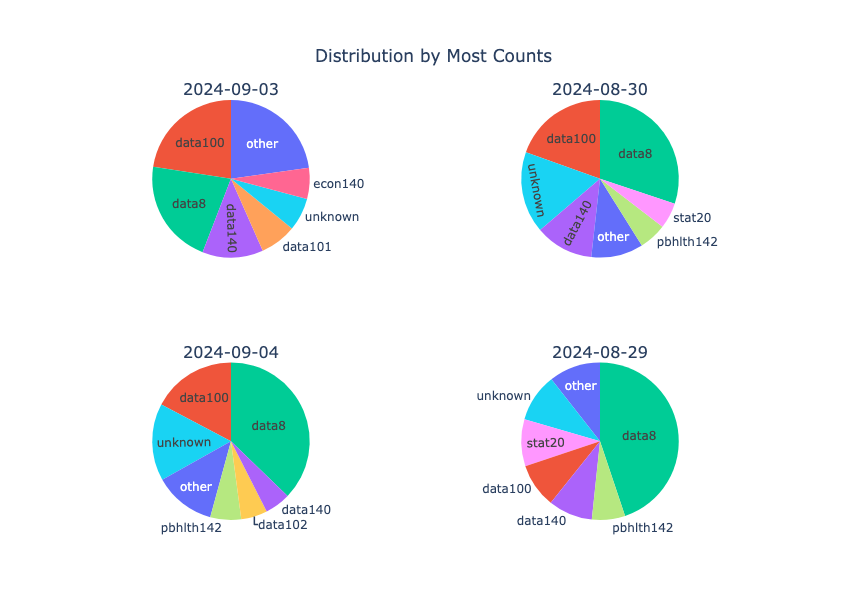

In [25]:
rows = (len(top_freq.timestamp_date) + 1) // 2

fig = make_subplots(
    rows=rows, 
    cols=2, 
    subplot_titles=[date for date in top_freq.timestamp_date],
    specs=[[{'type': 'domain'}, {'type': 'domain'}] for _ in range(rows)]
)

for i, date in enumerate(top_freq.timestamp_date):
    filtered_date = nbgitpuller_textPayload_df_pull_normal[nbgitpuller_textPayload_df_pull_normal['timestamp_date'] == date]
    date_dist = filtered_date['course'].value_counts()[:6]
    date_other = filtered_date['course'].value_counts()[6:].sum()
    if date_other > 0:
        date_dist['other'] = date_other
    
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Pie(
        labels=date_dist.index,
        values=date_dist.values,
        textinfo='label',
        hoverinfo='label+percent'
    ), row=row, col=col)

fig.update_layout(
    title=dict(
        text="Distribution by Most Counts",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    height=300 * rows,
    showlegend=False,
)

fig.show()

In [26]:
## Usage Frequency

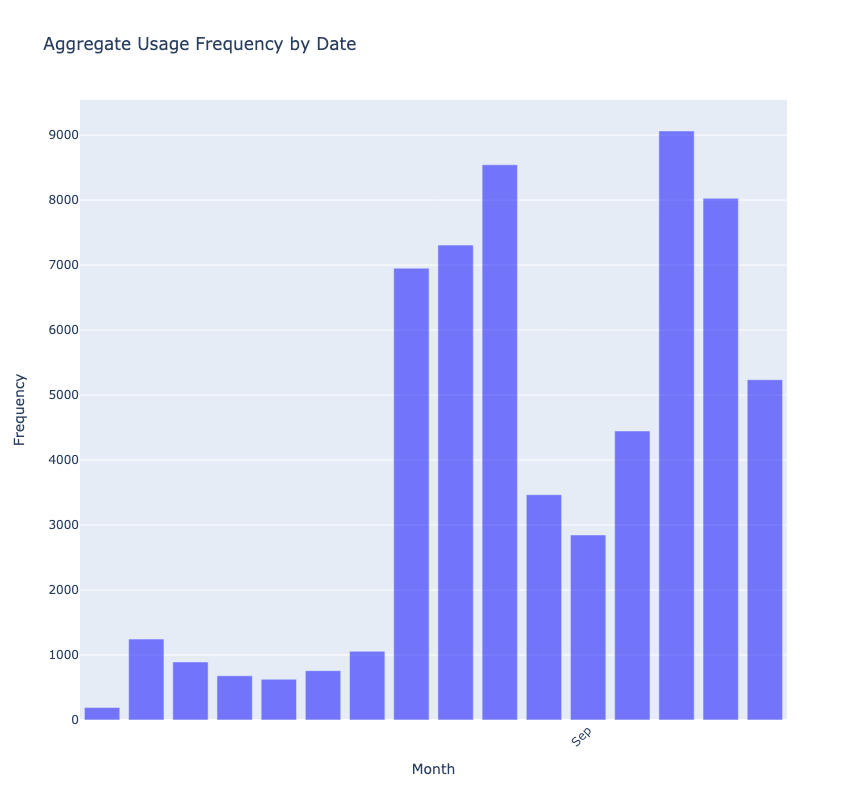

In [27]:
agg_course_date['timestamp_date'] = pd.to_datetime(agg_course_date['timestamp_date'])

agg_course_date['month'] = agg_course_date['timestamp_date'].dt.strftime('%b-%Y')
unique_months = agg_course_date['month'].unique()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=agg_course_date['timestamp_date'],
    y=agg_course_date['count'],
    marker=dict(color='rgba(0, 0, 255, 0.5)'),
    hoverinfo='x+y',
    hovertemplate='<b>Date:</b> %{x|%Y-%m-%d}<br><b>Count:</b> %{y}<extra></extra>',

))

fig.update_layout(
    title='Aggregate Usage Frequency by Date',
    xaxis_title='Month',
    yaxis_title='Frequency',
    xaxis=dict(
        tickangle=-45,
        tickformat='%b',
        tickvals=[d.strftime('%Y-%m-%d') for d in pd.date_range(start=agg_course_date['timestamp_date'].min(), end=agg_course_date['timestamp_date'].max(), freq='MS')]
    ),
    yaxis=dict(
        tickformat='d'
    ),
    hovermode='x',
    width=1200,  
    height=800, 
)

fig.show()

### Usage Frequency Comparisons by Date

In [29]:
def plot_course_usage(selected_courses):
    if len(set(selected_courses)) != 5:
        print("Please select exactly 5 unique courses to display the plots.")
        return

    total_plots = len(selected_courses)
    total_columns = 5
    fig, axes = plt.subplots(1, total_columns, figsize=(25, 5))

    for k, course_name in enumerate(selected_courses):
        course = nbgitpuller_textPayload_df_pull_normal[nbgitpuller_textPayload_df_pull_normal['course'] == course_name].reset_index()
        courses_date = course.groupby(by='timestamp_date').timestamp_date.count()
        ax = axes[k]  
        ax.bar(courses_date.index, courses_date)

        ax.set_title(f'{course_name} Usage Frequency')
        ax.set_xlabel('Date')
        ax.set_ylabel('Frequency')
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    plt.tight_layout()
    plt.show()

unique_courses = sorted(nbgitpuller_textPayload_df_pull_normal['course'].unique())
course_selectors_usage = [widgets.Dropdown(
    options=unique_courses,
    value=None,
    description=f'Course {i+1}',
    disabled=False
) for i in range(5)]

output_usage = widgets.Output()

def on_selection_change_usage(change):
    with output_usage:
        output_usage.clear_output()
        selected_courses = [selector.value for selector in course_selectors_usage]
        if None in selected_courses:
            print("Please select both courses.")
        elif len(set(selected_courses)) != 5:
            print("Please select 5 unique courses.")
        else:
            plot_course_usage(selected_courses)

for selector in course_selectors_usage:
    selector.observe(on_selection_change_usage, names='value')

display(*course_selectors_usage, output_usage)

Dropdown(description='Course 1', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 2', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 3', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 4', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 5', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Output()

### Usage Frequency by Hour

In [30]:
agg_course_time= nbgitpuller_textPayload_df_pull_normal.timestamp_time.value_counts()
agg_course_time = pd.DataFrame(agg_course_time)
agg_course_time = agg_course_time.reset_index()


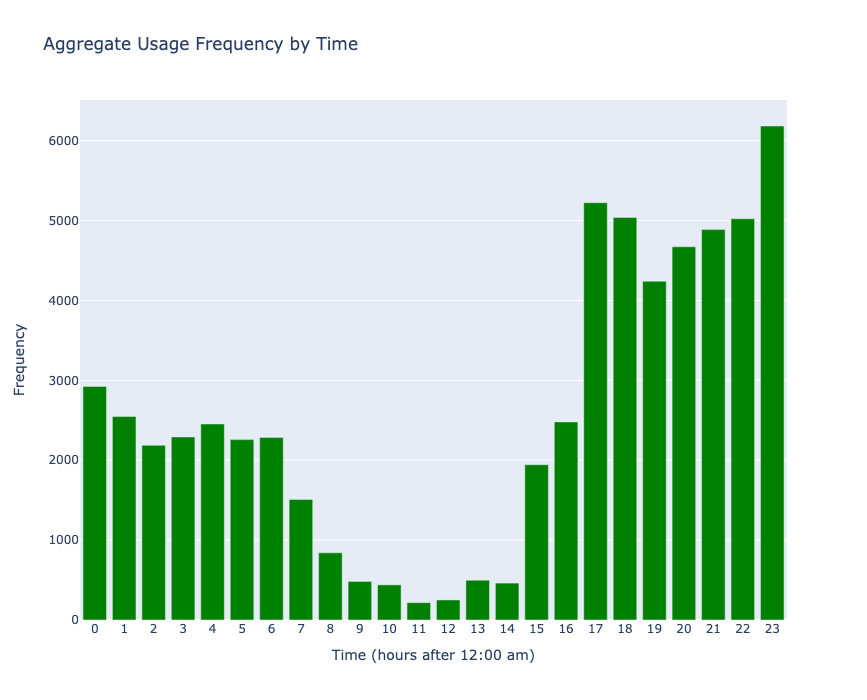

In [31]:
agg_course_time['timestamp_time'] = pd.to_datetime(agg_course_time['timestamp_time'], format='%H:%M:%S.%f')

agg_course_time['timestamp_time_hour'] = agg_course_time['timestamp_time'].dt.hour

agg_course_time_hourly = agg_course_time.groupby('timestamp_time_hour')['count'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=agg_course_time_hourly['timestamp_time_hour'],
    y=agg_course_time_hourly['count'],
    marker=dict(color='green'),
    hoverinfo='x+y',
    hovertemplate='<b>Hour:</b> %{x}<br><b>Count:</b> %{y}<extra></extra>',
))

fig.update_layout(
    title='Aggregate Usage Frequency by Time',
    xaxis_title='Time (hours after 12:00 am)',
    yaxis_title='Frequency',
    xaxis=dict(
        tickmode='linear',  
        tick0=0,  
        dtick=1, 
    ),
    yaxis=dict(
        tickformat='d'
    ),
    hovermode='x',
    width=1000,  
    height=700, 
)

fig.show()

In [32]:
def plot_course_time_usage(time_selected_courses):
    if len(set(time_selected_courses)) != 5:
        print("Please select exactly 5 unique courses to display the plots.")
        return

    total_plots = len(time_selected_courses)
    total_columns = 5
    fig, axes = plt.subplots(1, total_columns, figsize=(25, 5))

    for k, course_name in enumerate(time_selected_courses):
        course = nbgitpuller_textPayload_df_pull_normal[nbgitpuller_textPayload_df_pull_normal['course'] == course_name].reset_index()
        course['timestamp_time'] = pd.to_datetime(course['timestamp_time'], format='%H:%M:%S.%f')
        course['timestamp_time_hour'] = course['timestamp_time'].apply(lambda x: x.hour)
        courses_time = course.groupby(by='timestamp_time_hour').timestamp_time_hour.count()
        ax = axes[k]  
        ax.bar(courses_time.index, courses_time, color='green')

        ax.set_title(f'{course_name} Time Usage Frequency')
        ax.set_xlabel('Time (hours after 12:00 am)')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

course_selectors_time = [widgets.Dropdown(
    options=unique_courses,
    value=None,
    description=f'Course {i+1}',
    disabled=False
) for i in range(5)]

output_time = widgets.Output()

def on_selection_change_time(change):
    with output_time:
        output_time.clear_output()
        time_selected_courses = [selector.value for selector in course_selectors_time]
        if None in time_selected_courses:
            print("Please select both courses.")
        elif len(set(time_selected_courses)) != 5:
            print("Please select 5 unique courses.")
        else:
            plot_course_time_usage(time_selected_courses)

for selector in course_selectors_time:
    selector.observe(on_selection_change_time, names='value')

display(*course_selectors_time, output_time)

Dropdown(description='Course 1', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 2', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 3', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 4', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Dropdown(description='Course 5', options=('biology1b', 'civeng93', 'cogscic131', 'compsci189', 'cyplan88', 'da…

Output()

# Data Science Courses Only

In [33]:
import re

In [34]:
pattern = r"^data"
data_courses_only = nbgitpuller_textPayload_df_pull_normal[nbgitpuller_textPayload_df_pull_normal["course"].str.contains(pattern, regex=True)]

In [35]:
ds_counts = data_courses_only["course"].value_counts()

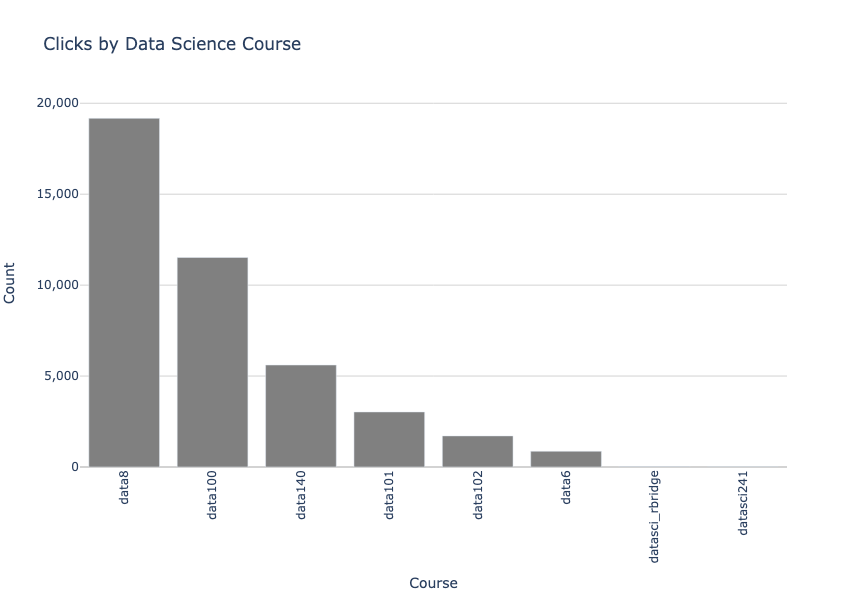

In [36]:
fig = go.Figure(data=[go.Bar(
    x=ds_counts.index,
    y=ds_counts.values,
    text=None, 
    textposition='outside',
    marker=dict(color='Grey')
)])

fig.update_layout(
    title='Clicks by Data Science Course', 
    xaxis_title='Course',
    yaxis_title='Count', 
    xaxis=dict(tickangle=-90),
    yaxis=dict(
        tickformat=',d',
        gridcolor='LightGrey',
        zerolinecolor='LightGrey'
    ),
    width=900,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='x unified',
    )

for trace in fig.data: 
    trace.hoverinfo = 'x+y'
    trace.hoverlabel = dict(bgcolor='LightGrey', font_size=16)
    
    fig.show()

In [37]:
pattern = r'(lab|hw|Homework|lec|proj|project|textbook)'

types = [re.search(pattern, path) for path in data_courses_only["git_path"]]
types = [match.group(1) if match else "unknown" for match in types]
data_courses_only["type"] = types

/tmp/ipykernel_347/1923266441.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# NOTE: % of DS courses unaccounted for
boo = [(type == None) for type in types]
none_val = data_courses_only[boo].git_path
missing_val = sum([type == "unknown" for type in types])
percent=missing_val/len(data_courses_only)

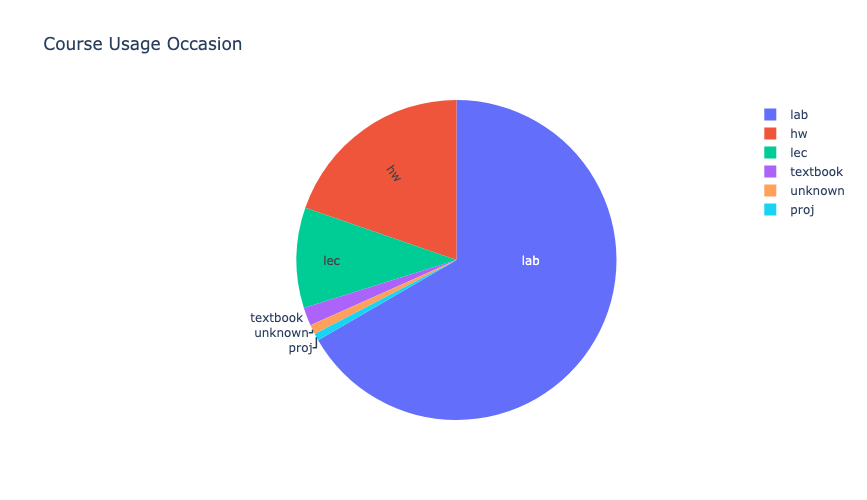

In [39]:
type_counts = data_courses_only.type.value_counts()

fig = go.Figure()

fig.add_trace(go.Pie(
    labels=type_counts.index,
    values=type_counts,
    textinfo='label',
    insidetextorientation='radial'
))

fig.update_layout(
    title='Course Usage Occasion',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

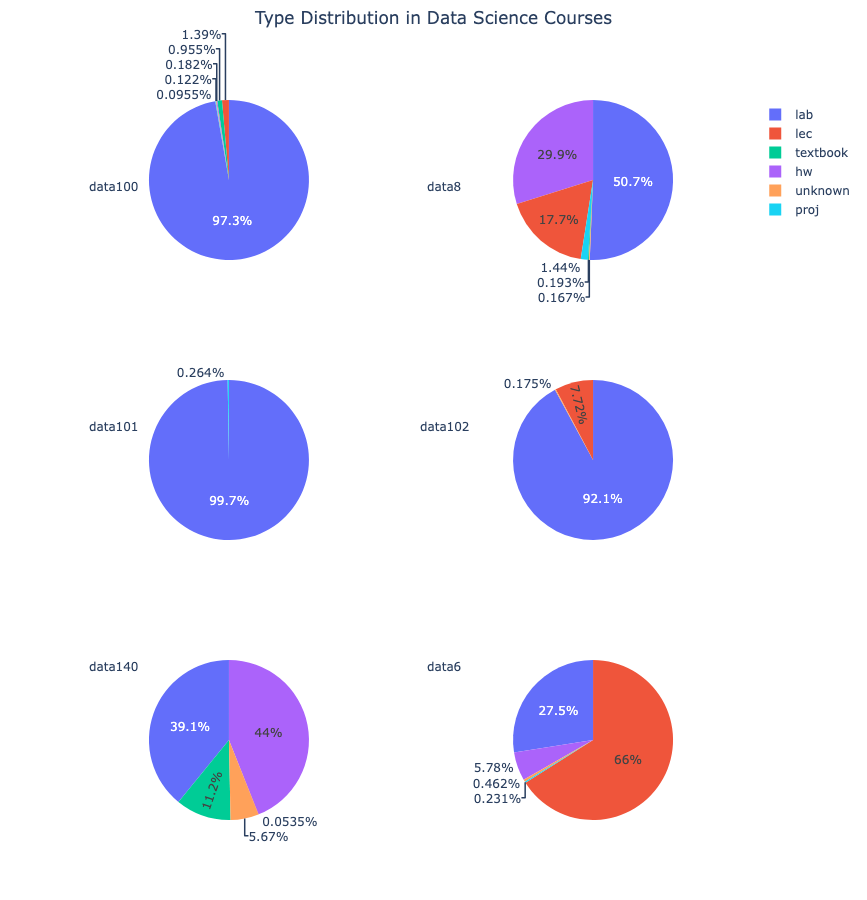

In [40]:
unique_courses = ['data100', 'data8', 'data101', 'data102', 'data140', 'data6']

rows = len(unique_courses) // 2 + len(unique_courses) % 2
fig = make_subplots(rows=rows, cols=2, subplot_titles=unique_courses, specs=[[{'type': 'domain'}] * 2] * rows)

for i, course in enumerate(unique_courses):
    filtered_course = data_courses_only[data_courses_only["course"] == course]
    course_counts = filtered_course["type"].value_counts()

    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Pie(labels=course_counts.index, values=course_counts.values, name=course, hoverinfo='label+percent'), row=row, col=col)

annotations = [
    dict(
        text=title,
        x=(col - 1) / 2 + 0.05,  
        y=(rows - row) / rows + 0.2, 
        xref='paper',
        yref='paper',
        showarrow=False,
        font=dict(size=12)
    )
    for i, title in enumerate(unique_courses)
    for row in [i // 2 + 1]
    for col in [i % 2 + 1]
]

fig.update_layout(
    title=dict(
        text='Type Distribution in Data Science Courses',
        y=0.987,  
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    height=300 * rows,  
    showlegend=True,
    annotations=annotations
)

fig.show()